# Analisi statistica dei dati relativi al decadimento della particella K*

__Nota__: questo documento è la versione stampabile di un notebook Jupyter. Se ne consiglia la visione online al seguente link: https://github.com/P2-718na/kstar-decay-analysis/blob/master/notebooks/kstar-decay.ipynb . Sulla stessa repository di GitHub (https://github.com/P2-718na/kstar-decay-analysis), sono presenti ulteriori istruzioni per scaricare ed eseguire il notebook localmente, usando JupyterLab.

## 1. Introduzione
La particella K\* è altamente instabile e ha una vita media di 10<sup>-11</sup> secondi; per questo motivo, per rilevarla si è costretti a ricorrere a metodi statistici piuttosto che a a metodi di rilevamento diretto. Lo scopo di questa esperienza di laboratorio è quello di provare l'esistenza della particella K\* tramite un'analisi statistica. In particolare, il codice che è stato sviluppato si occupa di:

1. Simulare eventi di collisione dell'esperimento _ALICE_ tramite il metodo di generazione Montecarlo.
2. Analizzare i dati raccolti, dimostrare l'esistenza della particella K\* e verificare i risultati ottenuti con un istogramma di controllo.

## 2. Struttura del codice
Il codice di simulazione è stato realizzato in _C++_ e fa uso intensivo delle librerie _ROOT_. È stato scelto un approccio diverso da quello consigliato, in modo da espandere ancora di più le possibilità di reimpiego del codice. Segue una breve descrizione di quello che è stato sviluppato.

### 2.1. Classi implementate
Sono state implementate due classi virtuali: `Entity` ed `Experiment`.

- <h4>Entity</h4>
  Una _Entity_ rappresenta una generica entità rilevabile da un esperimento (i.e. particella o risonanza), a cui sono associate una quantità di moto, una carica e una massa. Una _Entity_ può essere solo di un numero finito di tipi, ognuno definito da tre proprietà: carica, massa e larghezza di risonanza (quest'ultima esiste solo per le risonanze). Ogni tipo è implementato tramite una classe derivata di `Entity`, in cui sono dichiarate le rispettive proprietà; per risparmiare memoria, sono dichiarate come `static`.  
  I metodi e le proprietà condivise tra tutti i tipi, invece, sono salvati nella classe base `Entity`.
  
- <h4>Experiment</h4>
  Un _Experiment_ rappresenta un esperimento dell'_LHC_ e contiene il codice che si occupa di simulare gli eventi di collisione e raccogliere i dati. Per dare la possibilità di riutilizzare questo programma per esperimenti diversi, ogni esperimento è implementato tramite una classe derivata di `Experiment`. L'esperimento che interessa a noi è implementato in `KaonSDecay` ed è descritto accuratamente in <ins>[3. Generazione di dati]</ins>.

### 2.2. Meccanismi di reimpiego
Il polimorfismo dinamico ha reso possibile sviluppare il codice con una struttura modulare. Per aggiungere nuovi tipi di particelle o esperimenti, basta semplicemente aggiungere un file in cui se ne definiscano le proprietà. Tutto questo è stato realizzato prestando particolare attenzione all'utilizzo delle risorse disponibili: non sono presenti né dati duplicati né linee di codice ridondanti.

Il codice usato per la simulazione dei dati è disponibile su GitHub\[1\], assieme ad ulteriori informazioni e istruzioni per la compilazione.

\[1\]: https://github.com/P2-718na/ALICE-simulation

## 3. Generazione dei dati

### 3.1. Funzionamento del programma
Il numero di eventi di un esperimento di _ALICE_ è dell'ordine di 10<sup>5</sup>-10<sup>7</sup>, ognuno dei quali conta 10<sup>2</sup>-10<sup>4</sup> particelle. Il programma simula gli eventi uno ad uno, svolgendo le seguenti operazioni:

1. Viene generato un certo numero di particelle <ins>[3.2. Generazione delle particelle]</ins>.
2. Vengono fatte decadere le particelle instabili <ins>[3.3. Decadimenti]</ins>.
3. Vengono inseriti tutti i dati raccolti in un istogramma di _ROOT_.
4. Viene ripulita la memoria prima dell'evento successivo.

### 3.2. Generazione delle particelle
In ogni evento, è presente solo un numero limitato di tipi di particelle, tutte indistingubili tra loro. Per la loro generazione, quindi, si è tenuto conto solamente di:

- _PDF_ della distribuzione dei momenti delle particelle, come descritto in tabella <ins>[A.1]</ins>.
- Frequenza relativa con cui appare ogni tipo di particella, come descritto in tabella <ins>[A.2]</ins>.

Tutte le particelle generate vengono salvate in memoria fino alla simulazione dell'evento successivo.
Per generare numeri casuali secondo distribuzioni di probabilità, sono stati usati i metodi della classe `TRandom3` di _ROOT_.

### 3.3. Decadimenti
Non appena è generata una particella K\*, viene rimossa e sostituita da una coppia $\pi$/$\kappa$ di segno opposto, a fine di simulare il processo di decadimento. I prodotti del decadimento hanno la stessa energia della particella madre, divisa in modo casuale tra di loro.
Per consentire la creazione di un istogramma di controllo, questi vengono _marchiati_, così da poterli distinguere dalle particelle generate normalmente. In un esperimento reale non sarebbe possibile distinguere tra particelle prodotte dal decadimento e particelle generate da una collisione.

## 4. Analisi dei dati

### 4.1. Correttezza dei dati generati
- <h4>Abbondanza delle particelle</h4>
  Il numero di particelle generato corrisponde con quanto inserito nei dati di input e la percentuale di occorrenze di ogni singola particella è compatibile con quanto specificato nel programma, entro le incertezze. I dati sono riassunti in <ins>[B.1]</ins> e <ins>[A.3]</ins>
  
- <h4>Distribuzione angoli azimutali e polari</h4>
  Le distribuzioni attese sono uniformi. I risultati del fit, visibili in <ins>[B.2]</ins>, <ins>[B.3]</ins> e <ins>[A.4]</ins>, sono concordi con i valori attesi. Entrambi gli istogrammi sono divisi in $360$ bin e contengono $10^7$ elementi; il valore atteso per il parametro `p0` è: $10^7 / 360 = 2.778*10^4$, concorde con quanto ottenuto. Il fit è stato eseguito usando la funzione `pol0` di ROOT.
  
- <h4>Distribuzione modulo dell'impulso</h4>
  La distribuzione attesa è esponenziale, con media uno. I risultati del fit, visibili in <ins>[B.4]</ins> <ins>[A.4]</ins>, sono concordi con i valori attesi. Il fit è stato eseguito usando la funzione `expo` di ROOT.

### 4.2. Analisi degli istogrammi di massa invariante

Dal decadimento della K\* si generano sempre coppie Pione-Kaone di segno opposto, la cui massa invariante corrisponde proprio alla massa della K\*. Questa osservazione permette di utilizzare il seguente approccio per estrarre il segnale della K\*:

1. Si calcolano le masse invarianti di tutte le possibili coppie Pione/Kaone di _segno opposto_.
2. Si calcolano le masse invarianti di tutte le possibili coppie Pione/Kaone di _segno concorde_.
3. Si raccolgono i dati in due istogrammi (indicati come "3" e "4", sia nel codice che nel resto di questo documento). 
4. Si sottrae (4) da (3) (vedi <ins>[B.7]</ins>).

Sia in (3) che in (4) si trovano dei picchi in corrispondenza di tutte le combinazioni di massa invariante delle particelle. In (3), visto che è presente una piccola quantità di coppie Pione/Kaone generate da decadimenti della K\*, ci aspettiamo di trovare un altro picco in corrispondenza della massa della K\*. Il (4) permette di rimuovere il rumore di fondo da (3), evidenziando questo picco. In questo modo, ci si aspetta di ottenere un grafico risultante che segue la distribuzione della massa della K\*, con deviazione standard corrispondente all'ampiezza di risonanza della particella. Considerando i grafici di _tutte_ le coppie di particelle di segno opposto e concorde, ci si aspetta di ottenere un risultato consistente (vedi <ins>[B.6]</ins>).

In natura questa distribuzione è una Lorenziana; tuttavia, per semplicità, nel programma di generazione è stata usata una distribuzione Gaussiana. Le funzioni di fit sono state scelte di conseguenza.

Il programma di simulazione permette di realizzare un istogramma di controllo <ins>[B.5]</ins>. I dati ottenuti dal fit di questo istogramma sono concordi con i  parametri della simulazione. Anche i dati ottenuti dai fit dei due istogrammi <ins>[B.6]</ins> e <ins>[B.7]</ins> sono concordi con i parametri della simulazione. Tutti i risultati sono riassunti in <ins>[A.5]</ins>.

## Appendice A: Tabelle

<table>
    <caption><b>Tabella A.1.</b> Parametri di generazione.</caption>
    <tr>
        <th>Parametro</th>
        <th>Valore</th>
    </tr>
    <tr>
        <td>n° eventi</td>
        <td>10<sup>5</sup></td>
    </tr>
    <tr>
        <td>n° particelle per evento</td>
        <td>100</td>
    </tr>
    <tr>
        <td><i>PDF</i> modulo del momento</td>
        <td>Esponenziale, media 1</td>
    </tr>
    <tr>
        <td><i>PDF</i> angoli azimutali e polari</td>
        <td>Uniforme</td>
    </tr>
</table>
<div style="page-break-after: always;"></div>

<table>
    <caption><b>Tabella A.2.</b> Probabilità di generazione delle particelle, configurazione inserita nel programma.</caption>
    <tr>
        <th>Particella</th>
        <th>Probabilità relativa</th>
    </tr>
    <tr>
        <td>$\pi$+</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\pi$-</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\kappa$+</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>$\kappa$-</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>p+</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>p-</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>$\kappa$*</td>
        <td>1.0%</td>
    </tr>
</table>
<div style="page-break-after: always;"></div>

<table>
    <caption><b>Tabella A.3.</b> Abbondanza delle particelle generate, cofrontata con il valore atteso. Le incertezze sui valori osservati sono valutate usando la regola della radice.</caption>
    <tr>
        <th>Particella</th>
        <th>Numero atteso ($10^3$ occorrenze)</th>
        <th>Numero ottenuto ($10^3$ occorrenze) </th>
        <th>Percentuale attesa</th>
        <th>Percentuale ottenuta</th>
    </tr>
    <tr>
        <td>$\pi$+</td>
        <td>4000</td>
        <td>3999 $\pm$ 2</td>
        <td>40.0%</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\pi$-</td>
        <td>4000</td>
        <td>4000 $\pm$ 2</td>
        <td>40.0%</td>
        <td>40.0%</td>
    </tr>
    <tr>
        <td>$\kappa$+</td>
        <td>500</td>
        <td>500.3 $\pm$ 0.7</td>
        <td>5.0%</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>$\kappa$-</td>
        <td>500</td>
        <td>500.1 $\pm$ 0.7</td>
        <td>5.0%</td>
        <td>5.0%</td>
    </tr>
    <tr>
        <td>p+</td>
        <td>450</td>
        <td>449.0 $\pm$ 0.7</td>
        <td>4.5%</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>p-</td>
        <td>450</td>
        <td>450.7 $\pm$ 0.7</td>
        <td>4.5%</td>
        <td>4.5%</td>
    </tr>
    <tr>
        <td>$\kappa$*</td>
        <td>100</td>
        <td>100.5 $\pm$ 0.3</td>
        <td>1.0%</td>
        <td>1.0%</td>
    </tr>
    <tr>
        <td><b>Totale</b></td>
        <td>100</td>
        <td>10000 $\pm$ 7</td>
        <td>100.0%</td>
        <td>100.0%</td>
    </tr>
</table>
<div style="page-break-after: always;"></div>

<table>
    <caption><b>Tabella A.4.</b> Distribuzioni ottenute di angoli polari, azimutali e modulo dell'impulso.</caption>
    <tr>
        <th>Distribuzione</th>
        <th>Nome parametro del fit</th>
        <th>Valore parametro</th>
        <th>${\chi}^2$</th>
        <th>DOF</th>
        <th>${\chi}^2$/ DOF</th>
    </tr>
    <tr>
        <td>Angolo azimutale $\phi$ (<code>pol0</code>)</td>
        <td>p0 (intercetta)</td>
        <td>27780 $\pm$ 90</td>
        <td>357.6</td>
        <td>359</td>
        <td>0.996</td>
    </tr>
    <tr>
        <td>Angolo polare $\theta$ (<code>pol0</code>)</td>
        <td>p0 (intercetta)</td>
        <td>27780 $\pm$ 90</td>
        <td>337.2</td>
        <td>359</td>
        <td>0.939</td>
    </tr>
    <tr>
        <td>Modulo dell'impulso (<code>expo</code>)</td>
        <td>Slope (media esponenziale)</td>
        <td>1.0004 $\pm$ 0.0003</td>
        <td>527.2</td>
        <td>498</td>
        <td>1.06</td>
    </tr>
</table>
<div style="page-break-after: always;"></div>

<table>
    <caption><b>Tabella A.5.</b> Risultati analisi della K*.</caption>
    <tr>
        <th>Distribuzione di massa invariante (gaussiana)</th>
        <th>Media (MeV)</th>
        <th>Deviazione standard (MeV)</th>
        <th>Ampiezza (occorrenze)</th>
        <th>${\chi}^2$/ DOF</th>
    </tr>
    <tr>
        <td>Istogramma di controllo</td>
        <td>891.8 $\pm$ 0.2</td>
        <td>49.83 $\pm$ 0.11</td>
        <td>1608 $\pm$ 6</td>
        <td>0.916</td>
    </tr>
    <tr>
        <td>Differenza tra combinazioni di carica concorde/discorde di tutte le particelle</td>
        <td>891 $\pm$ 6</td>
        <td>55 $\pm$ 5</td>
        <td>7500 $\pm$ 600</td>
        <td>0.915</td>
    </tr>
    <tr>
        <td>Differenza tra combinazioni di carica concorde/discorde di coppie $\pi$/$\kappa$</td>
        <td>891.9 $\pm$ 1.9</td>
        <td>50.2 $\pm$ 1.9</td>
        <td>8000 $\pm$ 300</td>
        <td>0.932</td>
    </tr>
    <tr>
        <td>Valore inserito nella simulazione</td>
        <td>891.66</td>
        <td>50</td>
        <td>/</td>
        <td>/</td>
    </tr>
</table>
<div style="page-break-after: always;"></div>

# Appendice B: Grafici e codice di analisi dati

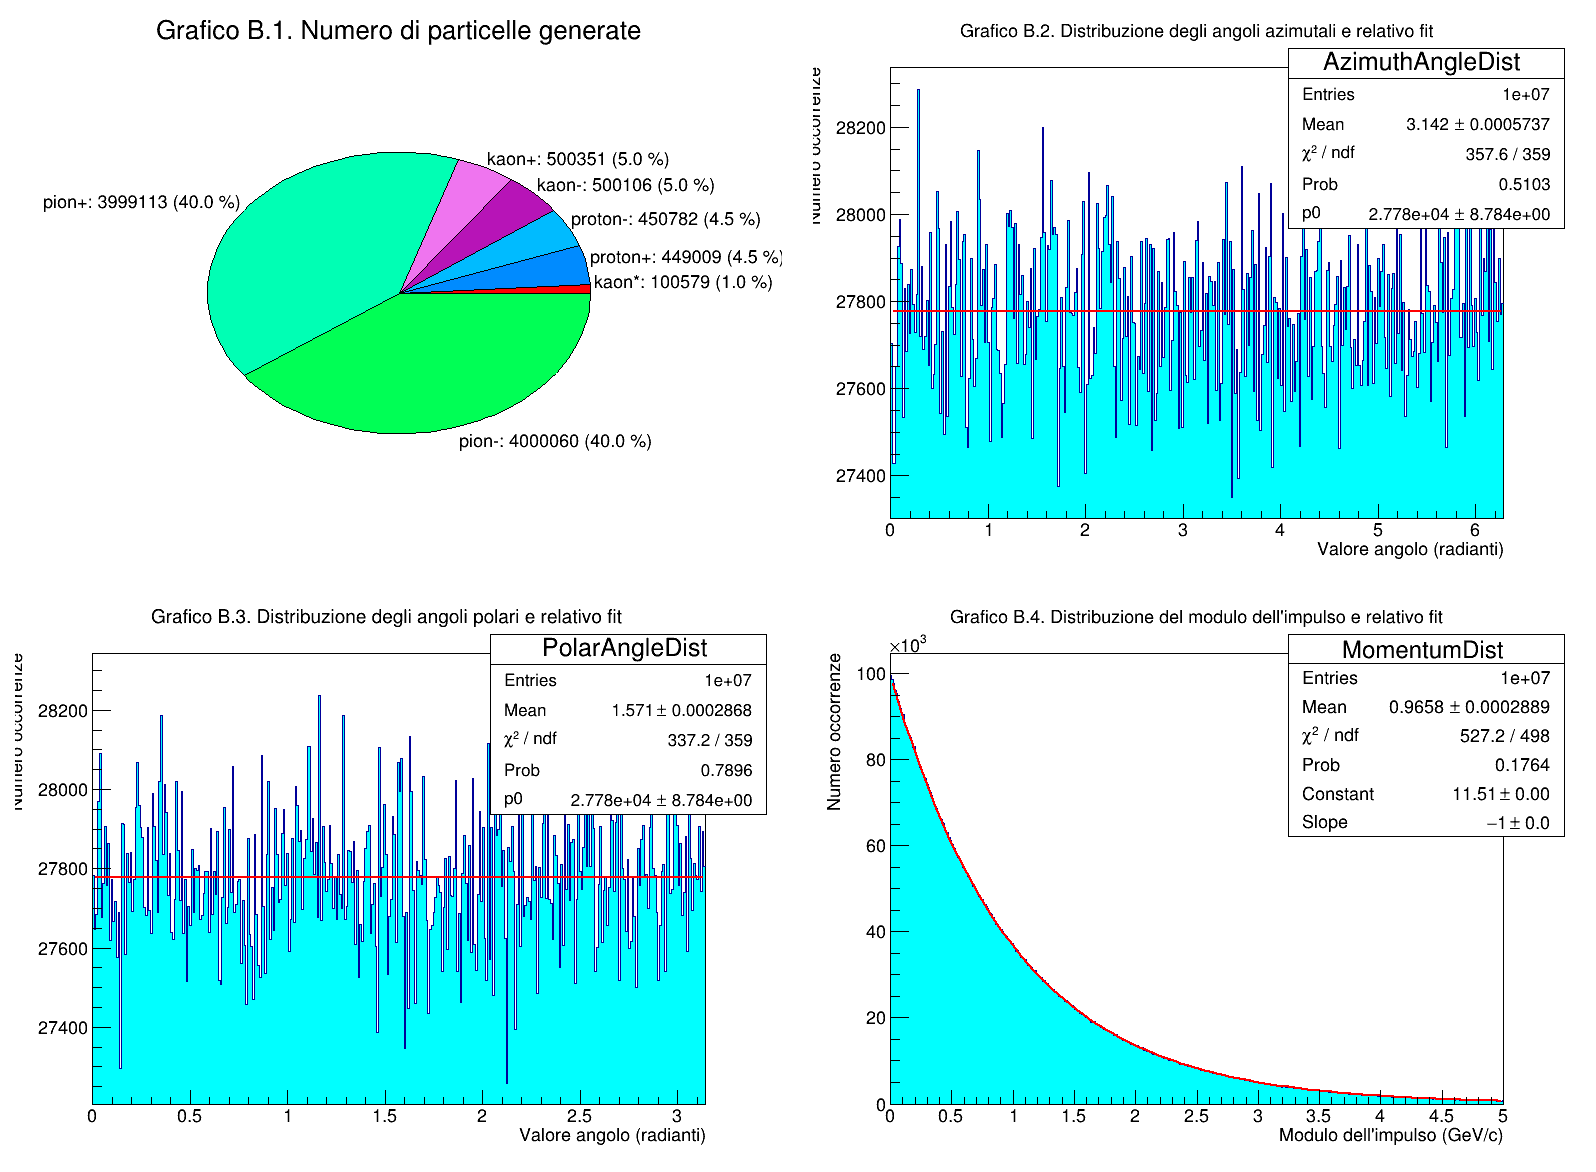

tau = -1.00038 +/- 0.000348437


In [1]:
// Carica i dati salvati da file
TFile* histograms = new TFile("../rootfiles/kstar-decay-hist.root","READ");

// Importa i grafici necessari per [4.1]
TH1F* ParticleDist     = (TH1F*)histograms->Get("ParticleDist");
TH1F* AzimuthAngleDist = (TH1F*)histograms->Get("AzimuthAngleDist");
TH1F* PolarAngleDist   = (TH1F*)histograms->Get("PolarAngleDist");
TH1F* MomentumDist     = (TH1F*)histograms->Get("MomentumDist");

// Imposta lo stile
gStyle->SetOptFit(1111);
gStyle->SetOptStat("neM");

// Crea una canvas per visualizzare i grafici e la divide in 4
TCanvas* cv = new TCanvas("cv1", "", 1600, 1200);
cv->Divide(2, 2);

cv->cd(1);
// Crea una pie per organizzare i dati
TPie * particleDistPie = new TPie(ParticleDist);

// Imposta lo stile
int colors[] = {2, 63, 65, 222, 224, 71, 75, 79};
particleDistPie->SetTitle("Grafico B.1. Numero di particelle generate");
particleDistPie->SetRadius(.25);
particleDistPie->SetValueFormat("%.0f");
particleDistPie->SetLabelFormat("%txt: %val (%perc)");
particleDistPie->SortSlices();
particleDistPie->SetFillColors(colors);
particleDistPie->Draw(); // Richiesta solo qua, non dove faccio gia chiamata a Fit();
                         // Nota: gli accenti nei commenti fanno crashare il kernel di jupyter.

cv->cd(2); // Questo deve stare prima della chiamata a Fit(), altrimenti le cose si rompono.
// Esegue il fit del grafico e lo disegna
AzimuthAngleDist->Fit("pol0", "Q");
AzimuthAngleDist->SetFillColor(7);
AzimuthAngleDist->SetTitle("Grafico B.2. Distribuzione degli angoli azimutali e relativo fit;Valore angolo (radianti);Numero occorrenze");

cv->cd(3);
// Esegue il fit del grafico e lo disegna
PolarAngleDist->Fit("pol0", "Q");
PolarAngleDist->SetFillColor(7);
PolarAngleDist->SetTitle("Grafico B.3. Distribuzione degli angoli polari e relativo fit;Valore angolo (radianti);Numero occorrenze");

cv->cd(4);
// Esegue il fit del grafico e lo disegna.
TFitResultPtr r = MomentumDist->Fit("expo", "SQ");
// Stampa il parametro con l'errore, visto che non compare nella legenda.
cout << "tau = " << r->Parameter(1) << " +/- " << r->ParError(1) << endl;
MomentumDist->SetFillColor(7);
MomentumDist->SetTitle("Grafico B.4. Distribuzione del modulo dell'impulso e relativo fit;Modulo dell'impulso (GeV/c);Numero occorrenze");

// Disegna la canvas
cv->Draw();

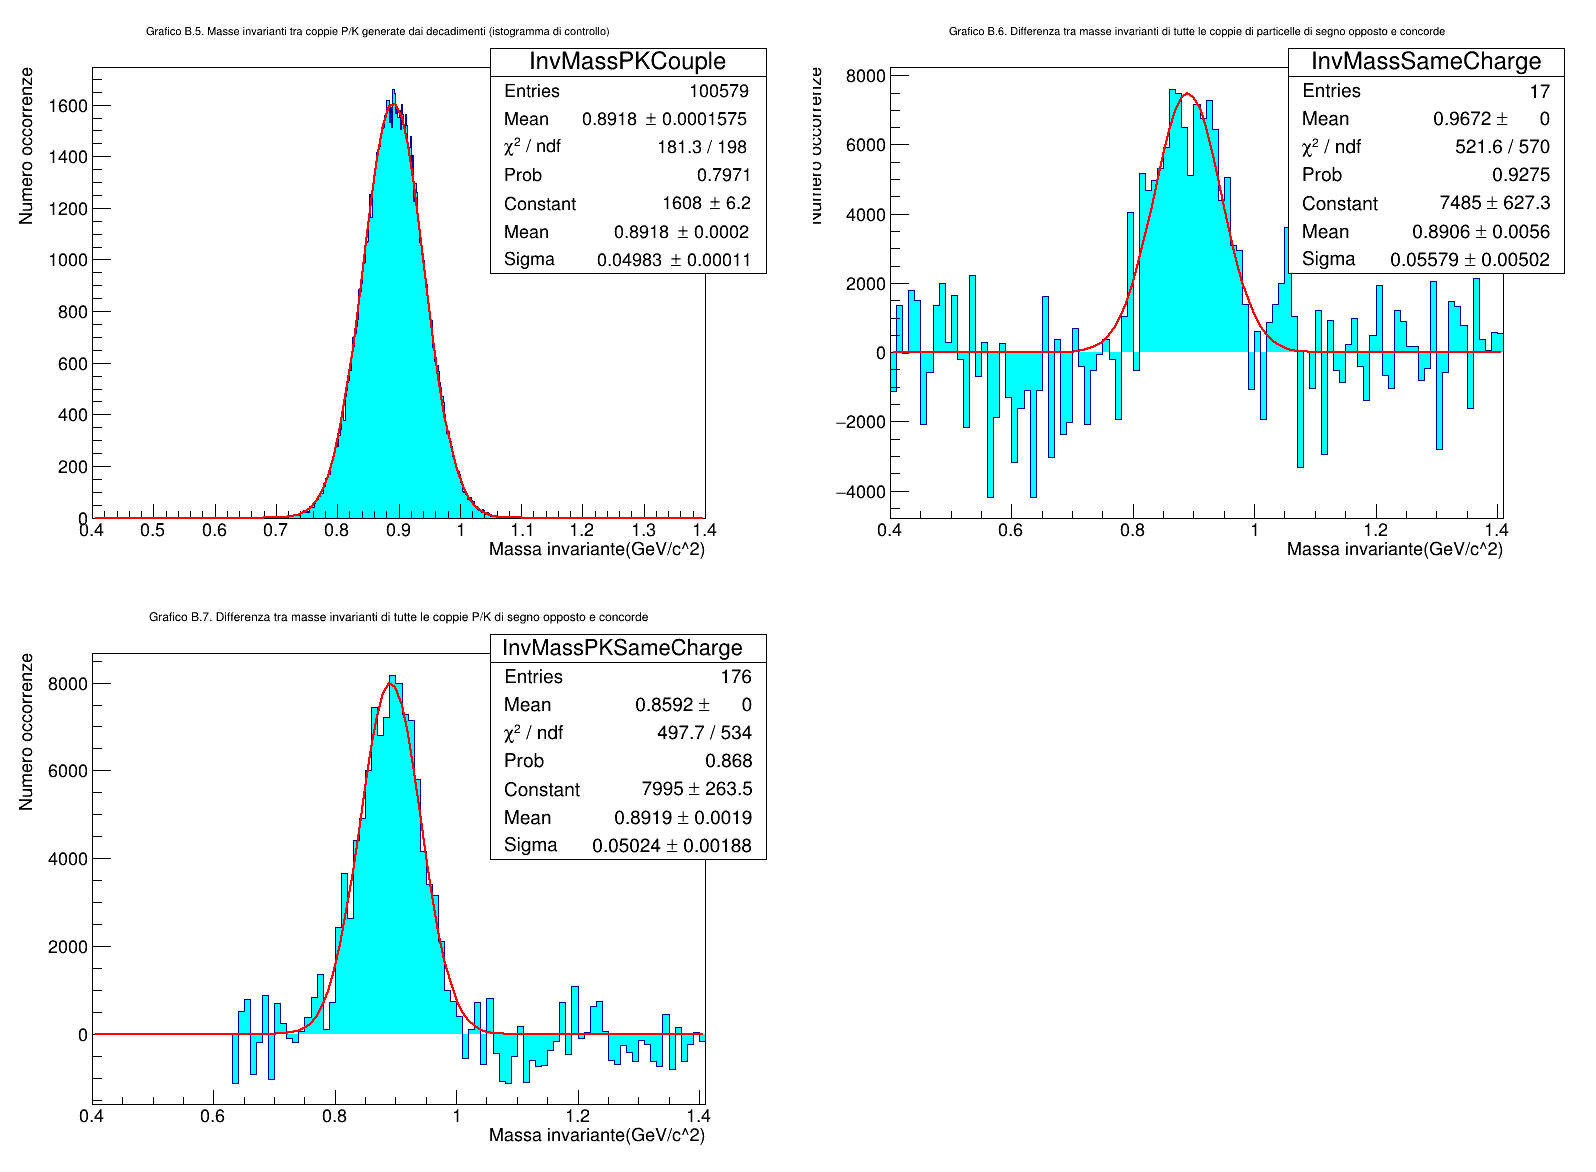

In [2]:
// Carica i dati salvati da file
TFile* histograms = new TFile("../rootfiles/kstar-decay-hist.root","READ");

// Importa i grafici necessari per [4.2]
TH1F* InvMassOppCharge    = (TH1F*)histograms->Get("InvMassOppCharge");   // (1)
TH1F* InvMassSameCharge   = (TH1F*)histograms->Get("InvMassSameCharge");  // (2)
TH1F* InvMassPKOppCharge  = (TH1F*)histograms->Get("InvMassPKOppCharge"); // (3)
TH1F* InvMassPKSameCharge = (TH1F*)histograms->Get("InvMassPKSameCharge");// (4)
TH1F* InvMassPKCouple     = (TH1F*)histograms->Get("InvMassPKCouple");    // (5)

// Imposta lo stile
gStyle->SetOptFit(1111);
gStyle->SetOptStat("neM");

// Crea una canvas per visualizzare i grafici e la divide in 4
TCanvas* cv = new TCanvas("cv2", "", 1600, 1200);
cv->Divide(2, 2);

// Crea l'istogramma di controllo
InvMassPKCouple->Fit("gaus", "Q0");
InvMassPKCouple->SetFillColor(7);
InvMassPKCouple->SetTitle("Grafico B.5. Masse invarianti tra coppie P/K generate dai decadimenti (istogramma di controllo);Massa invariante(GeV/c^2);Numero occorrenze");

// Crea l'istogramma differenza tra massa invariante di tutte le
// particelle di segno opposto e concorde
TH1F* InvMassSubtract = new TH1F(*InvMassSameCharge);
InvMassSubtract->SetDrawOption("HIST");
InvMassSubtract->SetTitle("Grafico B.6. Differenza tra masse invarianti di tutte le coppie di particelle di segno opposto e concorde;Massa invariante(GeV/c^2);Numero occorrenze");
InvMassSubtract->Add(InvMassOppCharge, InvMassSameCharge, 1, -1); // (1) - (2)
InvMassSubtract->Fit("gaus", "QB0");
InvMassSubtract->SetFillColor(7);
InvMassSubtract->SetAxisRange(0.4, 1.4);

// Crea l'istogramma differenza tra massa invariante di tutte le
// coppie P/K di segno opposto e concorde
TH1F* InvMassPKSubtract = new TH1F(*InvMassPKSameCharge);
InvMassPKSubtract->SetTitle("Grafico B.7. Differenza tra masse invarianti di tutte le coppie P/K di segno opposto e concorde;Massa invariante(GeV/c^2);Numero occorrenze");
InvMassPKSubtract->Add(InvMassPKOppCharge, InvMassPKSameCharge, 1, -1); // (3) - (4)
InvMassPKSubtract->Fit("gaus", "QB0");
InvMassPKSubtract->SetFillColor(7);
InvMassPKSubtract->SetAxisRange(0.4, 1.4);

cv->cd(1);
InvMassPKCouple->Draw("HIST");
TF1* ControlFit = InvMassPKCouple->GetFunction("gaus");
ControlFit->Draw("same");

cv->cd(2);
InvMassSubtract->Draw("HIST");
TF1* SubFit = InvMassSubtract->GetFunction("gaus");
SubFit->Draw("same");

cv->cd(3);
InvMassPKSubtract->Draw("HIST");
TF1* PKSubFit = InvMassPKSubtract->GetFunction("gaus");
PKSubFit->Draw("same");

cv->Draw();